# Análise de visitas - Hospitais

Autor: Ivo Silva de Souza Júnior <br/>
Linkedin: https://www.linkedin.com/in/ivossjunior/ <br/>
Github: https://github.com/ivossjunior <br/>
E-mail: ivossjunior@gmail.com 

# Sumário
- <a href="#agradecimentos">Agradecimentos</a>
- <a href="#objetivo">Objetivo</a>
- <a href="#cenario">Cenário</a>
- <a href="#bibliotecas">Bibliotecas</a>
- <a href="#importacao">Importação dos dados</a>
- <a href="#estrutura">Estrutura dos dados</a>
    - <a href="#visitas">Visitas</a>
    - <a href="#censo">Censo</a>
- <a href="#tratamento">Tratamento dos dados</a>
- <a href="#analise">Análise exploratória</a>
    - <a href="#distribuicao">Distribuição dos dados</a>
- <a href="#ml">Machine Learning</a>
    - <a href="#normalizacao">Normalização dos dados</a>
    - <a href="#modelos">Modelos</a>
    - <a href="#funcoes_auxiliares">Funções auxiliares</a>
    - <a href="#ml_norm">Aplicando Machine Learning nos dados normalizados</a>
    - <a href="#escalando">Escalando os dados</a>
    - <a href="#ml_scaled">Aplicando Machine Learning nos dados escalados</a>
    - <a href="#ver_resultados">Visualizando o resultado dos algoritmos</a>
    - <a href="#func_plot">Preparando as funções de plotagem dos resultados</a>
    - <a href="#plot_scores">Plotando os scores dos modelos</a>
    - <a href="#resultado">Resultado dos modelos</a>
- <a href="#conclusao">Conclusão</a>
- <a href="#dashboard">Dashboard</a>


# Agradecimentos <a class="anchor" id="agradecimentos" />

Gostaria de agradecer imensamente ao Felipe Santana, do Minerando Dados e Leonardo Nascimento, um amigo que trabalha comigo, graças a vocês eu consegui finalizar este projeto. 
Também gostaria de agradecer à minha família, namorada Tamires e aos meus amigos que estão sempre me incentivando a melhorar sempre e não me deixam desanimar!
Obrigado!

<a href="https://www.linkedin.com/in/lsn0/">Linkedin do Leonardo Nascimento</a><br/>
<a href="https://www.linkedin.com/in/felipe-santana-b5515a22/">Linkedin do Felipe Santana</a>

# Objetivo <a class="anchor" id="objetivo" />

Identificar a relação entre quantidade de pacientes internados e a quantidade de visitantes para posteriomente criar um modelo que possa prever a quantidade de visitantes.

# Cenário <a class="anchor" id="cenario" />

A necessidade de controlar o acesso de visitantes, acompanhantes, pacientes, prestadores de serviços e fornecedores nos hospitais é real e de suma importância para a segurança dos pacientes e dos colaboradores da instituição, sabendo disso, me foi solicitado a criação de um sistema de controle de visitas que fosse integrado ao ERP da empresa com o objetivo de identificar todos os visitantes através de etiqueta que é colada em um local vísivel na roupa do visitante.

# Bibliotecas <a class="anchor" id="bibliotecas" />

Import de todas as bibliotecas que foram necessárias para a realização deste projeto

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import warnings
import numpy as np

In [3]:
warnings.filterwarnings("ignore")

# Importando os dados <a class="anchor" id="importacao" />

Conforme descrito no Cenário, os dados são oriundos de dois sistemas, do ERP da empresa e do programa que desenvolvi para o controle de visitas, após a extração dos dados em formato csv, iremos importá-los abaixo:

In [4]:
df_visitas = pd.read_csv('visitas.csv', sep = ';')
df_censo = pd.read_csv('censo.csv', sep = ';')

# Visualizando a estrutura dos dados <a class="anchor" id="estrutura" />

## Dataset de visitas <a class="anchor" id="visitas" />
Dicionário de dados:
<table>
    <thead>
        <th>Coluna</th>
        <th>Descrição</th>
    </thead>
    <tbody>
        <tr>
            <td>Id</td>
            <td>Campo identificador do registro da visita</td>
        </tr>
        <tr>
            <td>DataHoraEntrada</td>
            <td>Data e hora da liberação da visita</td>
        </tr>
        <tr>
            <td>IdVisitante</td>
            <td>Campo identificador do visitante</td>
        </tr>
        <tr>
            <td>IdCensoItem</td>
            <td>Campo identificador da diária de internação do paciente, podendo ser nulo em caso de visitante diferente dos tipos (Acompanhante, Visitante)</td>
        </tr>
        <tr>
            <td>IdOperadorLiberacao</td>
            <td>Campo identificador do operador que liberou a visita</td>
        </tr>
        <tr>
            <td>DataHoraSaida</td>
            <td>Data e hora da baixa da visita</td>
        </tr>
        <tr>
            <td>TipoVisita</td>
            <td>Campo que identifica o tipo de visita</td>
        </tr>
        <tr>
            <td>Local</td>
            <td>Campo identificador do hospital onde a visita foi realizada</td>
        </tr>
    </tbody>
</table>

In [4]:
df_visitas.head()

,Id,DataHoraEntrada,IdVisitante,IdCensoItem,IdOperadorLiberacao,DataHoraSaida,TipoVisita,Local
0,54,2019-05-23 17:12:08.817,1,471596,2228,2019-05-24 09:08:04.413,Acompanhante,SC
1,55,2019-05-24 09:23:07.353,1,471727,2228,2019-05-24 09:23:23.460,Acompanhante,SC
2,56,2019-05-24 11:00:16.493,1,471749,2228,2019-05-27 08:45:16.530,Visitante,SC
3,57,2019-05-24 13:09:19.513,10,471727,1609,2019-05-27 16:22:09.927,Visitante,SC
4,58,2019-05-24 13:46:00.393,11,471727,2228,2019-05-24 13:48:05.743,Acompanhante,SC


## Dataset censo <a class="anchor" id="censo" />
Dicionário de dados:
<table>
    <thead>
        <th>Coluna</th>
        <th>Descrição</th>
    </thead>
    <tbody>
        <tr>
            <td>IdCensoItem</td>
            <td>Campo identificador da diária de internação do paciente</td>
        </tr>
        <tr>
            <td>IdClienteConvenio</td>
            <td>Campo identificador do convênio do paciente</td>
        </tr>
        <tr>
            <td>DataDiaria</td>
            <td>Data da diaria de internação </td>
        </tr>
        <tr>
            <td>Alta</td>
            <td>Campo que informa se o paciente recebeu alta administrativa nesta diária</td>
        </tr>
        <tr>
            <td>CID</td>
            <td>Campo que recebe a classificação internacional de doenças</td>
        </tr>
    </tbody>
</table>

In [5]:
df_censo.head()

,IdCensoItem,IdClienteConvenio,DataDiaria,Alta,CID
0,473551,749115,2019-06-03 00:00:00.000,N,NaN
1,473552,1361043,2019-06-03 00:00:00.000,S,NaN
2,473553,1361104,2019-06-03 00:00:00.000,N,NaN
3,473554,1349530,2019-06-03 00:00:00.000,N,NaN
4,473555,1361112,2019-06-03 00:00:00.000,N,NaN


Identificando os tipos de dados dos dataframes

In [6]:
df_visitas.dtypes

Id                      int64
DataHoraEntrada        object
IdVisitante             int64
IdCensoItem             int64
IdOperadorLiberacao     int64
DataHoraSaida          object
TipoVisita             object
Local                  object
dtype: object

In [7]:
df_censo.dtypes

IdCensoItem            int64
IdClienteConvenio      int64
DataDiaria            object
Alta                  object
CID                  float64
dtype: object

# Tratamento dos dados <a class="anchor" id="tratamento" />

In [5]:
def convert_to_date(value):
    return dt.datetime.strptime(value, '%Y-%m-%d %H:%M:%S.%f')

In [6]:
df_visitas['DataHoraEntradaConvertida'] = list(map(convert_to_date, df_visitas['DataHoraEntrada']))

Iremos criar uma nova coluna do nosso dataset para identificar se o dia da visita é sábado ou domingo.

In [7]:
def is_weekend(value):    
    if value.weekday() < 5:
        return 0
    else:
        return 1

In [8]:
df_visitas['FimDeSemana'] = list(map(is_weekend, df_visitas['DataHoraEntradaConvertida']))

Função responsável pela transformação da data em um número inteiro que a simbolize. Usaremos esta função para criar um Id com base na data para realizar o join entre os dois datasets

In [9]:
def date_to_int(value):
    return int(value.replace('-', '')[0:8])
    

In [10]:
df_visitas['IdData'] = list(map(date_to_int, df_visitas['DataHoraEntrada']))

In [11]:
df_visitas['IdData'].head()

0    20190523
1    20190524
2    20190524
3    20190524
4    20190524
Name: IdData, dtype: int64

Faremos o mesmo tratamento com a data da diária do paciente no dataset censo

In [12]:
df_censo['IdData'] = list(map(date_to_int, df_censo['DataDiaria']))

In [16]:
df_censo.head()

,IdCensoItem,IdClienteConvenio,DataDiaria,Alta,CID,IdData
0,473551,749115,2019-06-03 00:00:00.000,N,NaN,20190603
1,473552,1361043,2019-06-03 00:00:00.000,S,NaN,20190603
2,473553,1361104,2019-06-03 00:00:00.000,N,NaN,20190603
3,473554,1349530,2019-06-03 00:00:00.000,N,NaN,20190603
4,473555,1361112,2019-06-03 00:00:00.000,N,NaN,20190603


In [17]:
df_visitas.head()

,Id,DataHoraEntrada,IdVisitante,IdCensoItem,IdOperadorLiberacao,DataHoraSaida,TipoVisita,Local,DataHoraEntradaConvertida,FimDeSemana,IdData
0,54,2019-05-23 17:12:08.817,1,471596,2228,2019-05-24 09:08:04.413,Acompanhante,SC,2019-05-23 17:12:08.817,0,20190523
1,55,2019-05-24 09:23:07.353,1,471727,2228,2019-05-24 09:23:23.460,Acompanhante,SC,2019-05-24 09:23:07.353,0,20190524
2,56,2019-05-24 11:00:16.493,1,471749,2228,2019-05-27 08:45:16.530,Visitante,SC,2019-05-24 11:00:16.493,0,20190524
3,57,2019-05-24 13:09:19.513,10,471727,1609,2019-05-27 16:22:09.927,Visitante,SC,2019-05-24 13:09:19.513,0,20190524
4,58,2019-05-24 13:46:00.393,11,471727,2228,2019-05-24 13:48:05.743,Acompanhante,SC,2019-05-24 13:46:00.393,0,20190524


Iremos criar uma variável para obter a hora de entrada e em seguida usá-la para criar uma nova variável chamada Turno

In [13]:
def get_visitation_hour(value):
    return int(value.hour)

In [14]:
def set_shift(value):
    if value >= 6 and value < 12:
        return 0
    elif value > 12 and value < 18:
        return 1
    else:
        return 2

In [15]:
df_visitas['HoraEntrada'] = list(map(get_visitation_hour, df_visitas['DataHoraEntradaConvertida']))

In [16]:
df_visitas['Turno'] = list(map(set_shift, df_visitas['HoraEntrada']))

In [17]:
df_visitas.head()

,Id,DataHoraEntrada,IdVisitante,IdCensoItem,IdOperadorLiberacao,DataHoraSaida,TipoVisita,Local,DataHoraEntradaConvertida,FimDeSemana,IdData,HoraEntrada,Turno
0,54,2019-05-23 17:12:08.817,1,471596,2228,2019-05-24 09:08:04.413,Acompanhante,SC,2019-05-23 17:12:08.817,0,20190523,17,1
1,55,2019-05-24 09:23:07.353,1,471727,2228,2019-05-24 09:23:23.460,Acompanhante,SC,2019-05-24 09:23:07.353,0,20190524,9,0
2,56,2019-05-24 11:00:16.493,1,471749,2228,2019-05-27 08:45:16.530,Visitante,SC,2019-05-24 11:00:16.493,0,20190524,11,0
3,57,2019-05-24 13:09:19.513,10,471727,1609,2019-05-27 16:22:09.927,Visitante,SC,2019-05-24 13:09:19.513,0,20190524,13,1
4,58,2019-05-24 13:46:00.393,11,471727,2228,2019-05-24 13:48:05.743,Acompanhante,SC,2019-05-24 13:46:00.393,0,20190524,13,1


Iremos filtrar o dataset para que retorne somente os TipoVisitas Acompanhante e Visitante, pois estes caracterizam uma visita a um paciente internado, e em seguida realizaremos a contagem por dia de visitantes.

In [18]:
df_visitas_sum = df_visitas[df_visitas.TipoVisita.isin(['Acompanhante', 'Visitante'])]

Separamos em duas versões, uma com 4 variáveis preditoras e outra apenas com duas com a finalidade de comparar os dois modelos posteriormente.

In [19]:
df_visitas_sum1 = df_visitas_sum.groupby(['IdData', 'FimDeSemana', 'HoraEntrada', 'Turno'])['Id'].count()
df_visitas_sum2 = df_visitas_sum.groupby(['IdData', 'FimDeSemana'])['Id'].count()

Visualizando as últimas visitas

In [20]:
df_visitas_sum.tail(10)

,Id,DataHoraEntrada,IdVisitante,IdCensoItem,IdOperadorLiberacao,DataHoraSaida,TipoVisita,Local,DataHoraEntradaConvertida,FimDeSemana,IdData,HoraEntrada,Turno
17465,21446,2019-08-23 13:52:23.490,14777,487124,3833,NaN,Visitante,SC,2019-08-23 13:52:23.490,0,20190823,13,1
17466,21447,2019-08-23 13:53:23.030,10642,486983,3873,NaN,Visitante,HI,2019-08-23 13:53:23.030,0,20190823,13,1
17467,21448,2019-08-23 13:54:02.930,10793,486983,3873,NaN,Visitante,HI,2019-08-23 13:54:02.930,0,20190823,13,1
17468,21449,2019-08-23 13:55:38.093,13704,487001,3833,NaN,Visitante,SC,2019-08-23 13:55:38.093,0,20190823,13,1
17470,21451,2019-08-23 13:56:43.933,14778,487099,3833,NaN,Visitante,SC,2019-08-23 13:56:43.933,0,20190823,13,1
17474,21455,2019-08-23 14:02:19.630,14780,487095,3873,NaN,Visitante,HI,2019-08-23 14:02:19.630,0,20190823,14,1
17475,21456,2019-08-23 14:02:29.610,14781,486978,3833,NaN,Visitante,SC,2019-08-23 14:02:29.610,0,20190823,14,1
17476,21457,2019-08-23 14:02:44.727,14562,487095,3873,2019-08-23 14:03:22.453,Visitante,HI,2019-08-23 14:02:44.727,0,20190823,14,1
17477,21458,2019-08-23 14:03:13.090,14782,486978,3833,NaN,Visitante,SC,2019-08-23 14:03:13.090,0,20190823,14,1
17478,21459,2019-08-23 14:03:36.603,14476,487095,3873,NaN,Visitante,HI,2019-08-23 14:03:36.603,0,20190823,14,1


In [21]:
df_censo_sum = df_censo.groupby(['IdData'])['IdCensoItem'].count()

Quando sumarizamos os dataframes, censo e visitas, o retorno foi um objeto do tipo series do pandas, na próxima linha iremos convertê-los para dataframe e realizar o join. Como os datasets serão unificados através do campo IdData, não será necessário identificar na função join os campos chaves.

In [22]:
dataset = df_censo_sum.to_frame().join(df_visitas_sum1.to_frame())

In [23]:
dataset2 = df_censo_sum.to_frame().join(df_visitas_sum2.to_frame())

In [24]:
dataset.head()

IdCensoItem  Id
IdData   FimDeSemana HoraEntrada Turno                 
20190610 0           11          0              160   4
                     13          1              160   5
                     14          1              160  13
                     15          1              160  15
                     16          1              160   5

In [25]:
dataset2.head()

,,IdCensoItem,Id
IdData,FimDeSemana,,
20190610,0,160,71
20190611,0,163,49
20190612,0,169,66
20190613,0,168,75
20190614,0,167,80


Iremos alterar o nome das colunas IdCensoItem e Id para facilitar a compreensão deste novo dataset, pois sabemos que os campos IdCensoItem é a quantidade de pacientes no censo diário e Id é a quantidade de visitantes e acompanhantes do dia.

In [26]:
dataset.columns = ['QuantidadePacientes', 'QuantidadeVisitantes']
dataset2.columns = ['QuantidadePacientes', 'QuantidadeVisitantes']

In [27]:
dataset.head()

QuantidadePacientes  \
IdData   FimDeSemana HoraEntrada Turno                        
20190610 0           11          0                      160   
                     13          1                      160   
                     14          1                      160   
                     15          1                      160   
                     16          1                      160   

                                        QuantidadeVisitantes  
IdData   FimDeSemana HoraEntrada Turno                        
20190610 0           11          0                         4  
                     13          1                         5  
                     14          1                        13  
                     15          1                        15  
                     16          1                         5

In [28]:
dataset2.head()

,,QuantidadePacientes,QuantidadeVisitantes
IdData,FimDeSemana,,
20190610,0,160,71
20190611,0,163,49
20190612,0,169,66
20190613,0,168,75
20190614,0,167,80


Vamos remover os Index's e transformá-los em colunas para posterior análise

In [29]:
dataset.reset_index(level = ['FimDeSemana', 'IdData', 'HoraEntrada', 'Turno'], inplace = True)
dataset2.reset_index(level = ['FimDeSemana', 'IdData'], inplace = True)

In [30]:
dataset.head(10)

,IdData,FimDeSemana,HoraEntrada,Turno,QuantidadePacientes,QuantidadeVisitantes
0,20190610,0,11,0,160,4
1,20190610,0,13,1,160,5
2,20190610,0,14,1,160,13
3,20190610,0,15,1,160,15
4,20190610,0,16,1,160,5
5,20190610,0,17,1,160,12
6,20190610,0,18,2,160,8
7,20190610,0,19,2,160,5
8,20190610,0,20,2,160,1
9,20190610,0,21,2,160,3


In [31]:
dataset2.head()

,IdData,FimDeSemana,QuantidadePacientes,QuantidadeVisitantes
0,20190610,0,160,71
1,20190611,0,163,49
2,20190612,0,169,66
3,20190613,0,168,75
4,20190614,0,167,80


# Análise exploratória <a class="anchor" id="analise" />

Exibindo a quantidade de pacientes internados vs a quantidade de visitantes, desconsiderando a quantidade de visitas por horário/turno:

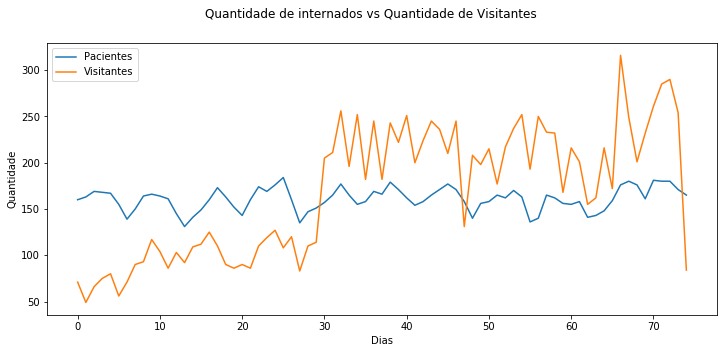

In [35]:
fig = plt.figure(figsize = (12, 5))
fig.suptitle('Quantidade de internados vs Quantidade de Visitantes')

plt.plot(dataset2['QuantidadePacientes'], label = 'Pacientes')
plt.plot(dataset2['QuantidadeVisitantes'], label = 'Visitantes')

plt.xlabel('Dias')
plt.ylabel('Quantidade')

plt.legend()

plt.show()

Como podemos ver no gráfico, a quantidade de visitantes tende a crescer com o aumento de pacientes internados.

### Distribuição dos dados <a class="anchor" id="distribuicao" />

Pairplot do primeiro dataset

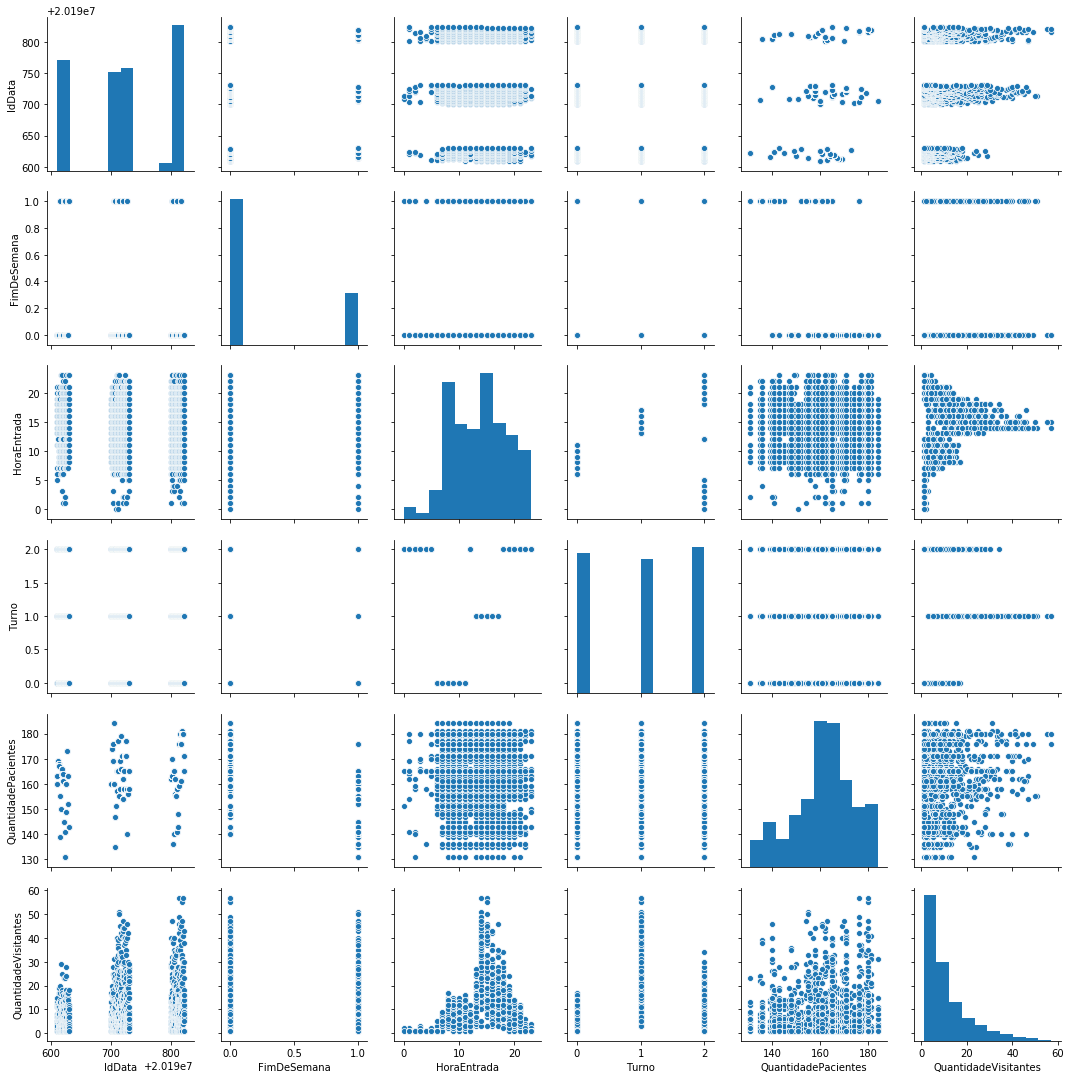

In [38]:
sns.pairplot(dataset)

Criando a matrix e o heatmap com a correlação das variáveis

In [39]:
cor = dataset.corr()
cor2 = dataset2.corr()

HeatMap do primeiro dataset

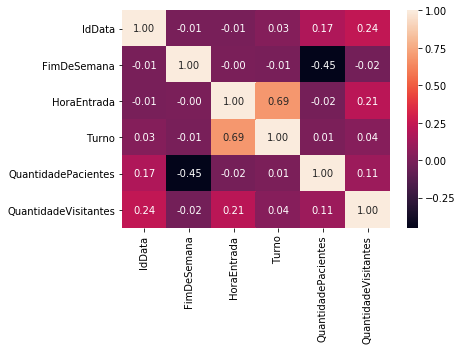

In [40]:
sns.heatmap(cor, annot = True, fmt = '.2f')

HeatMap do segundo dataset

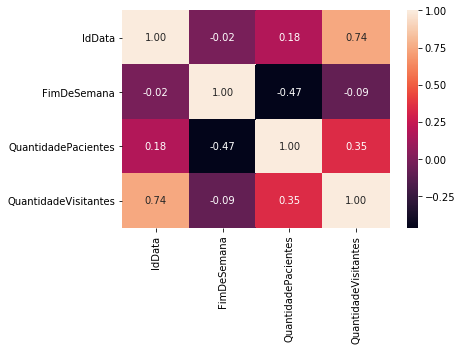

In [41]:
sns.heatmap(cor2, annot = True, fmt = '.2f')

Pairplot do segundo dataset

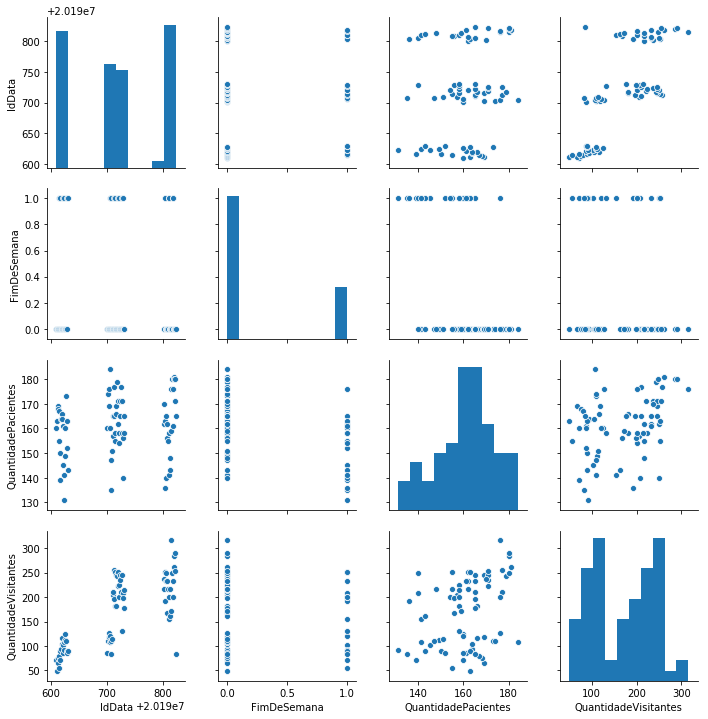

In [42]:
sns.pairplot(dataset2)

# Transformações para aplicação de machine learning <a class="anchor" id="ml" />

Agora iremos criar o modelo utilizando o dataset com 5 variáveis preditoras (IdData, FimDeSemana, HoraEntrada, Turno, QuantidadePacientes)

## Normalização dos dados<a id="normalizacao" />

In [43]:
norm = Normalizer()

In [44]:
normalized_dataset = norm.fit_transform(dataset)
norm_x1 = normalized_dataset[:, 0:5]
norm_y1 = normalized_dataset[:, 5]

In [45]:
normalized_dataset2 = norm.fit_transform(dataset2)
norm_x2 = normalized_dataset2[:, 0:3]
norm_y2 = normalized_dataset2[:, 3]

Divisão em dados de treino e teste dos dados normalizados do dataset01

In [46]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(norm_x1, norm_y1, test_size = 0.30, random_state = 1)

Criando dados de treino e teste dos dados normalizados do dataset02

In [47]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(norm_x2, norm_y2, test_size = 0.30, random_state = 1)

## Lista de modelos utilizados<a id="modelos" />

Criando uma lista com os algoritmos que iremos utilizar juntamento com as especificações do GridSearchCV para encontrar a melhor combinação de parâmetros e assim melhorar nosso resultado

In [48]:
models = [
    {
        'Algoritmo': 'Linear Regression', 
        'Modelo': LinearRegression(), 
        'Predição': None, 
        'GridSearch': {
            'Modelo': None,
            'Parametros': 
                {
                    'fit_intercept': [True, False],
                    'normalize': [False, True],
                    'n_jobs': [None, 1, 2, 3, 4, 5]
                },
            'Predição': None
        }
    },
    {
        'Algoritmo': 'Ridge', 
        'Modelo': Ridge(), 
        'Predição': None, 
        'GridSearch': {
            'Modelo': None,
            'Parametros': {
                'alpha': [0.1, 0.5, 1.0, 1.5]
            },
            'Predição': None
        }
    },
    {
        'Algoritmo': 'Decision Tree', 
        'Modelo': DecisionTreeRegressor(), 
        'Predição': None,
        'GridSearch': {
            'Modelo': None,
            'Parametros': {},
            'Predição': None
        }
    },
    {
        'Algoritmo': 'Random Forest', 
        'Modelo': RandomForestRegressor(), 
        'Predição': None,
        'GridSearch': {
            'Modelo': None,
            'Parametros':
                {
                    'n_estimators': [5, 10, 15, 20, 30, 40, 50, 70, 85, 100],
                    'criterion': ['mse', 'mae'],
                    'bootstrap': [False, True]
                },
            'Predição': None
        }
    },
    {
        'Algoritmo': 'Gradient Boosting Regressor', 
        'Modelo': GradientBoostingRegressor(), 
        'Predição': None,
        'GridSearch': {
            'Modelo': None,
            'Parametros': 
                {
                    'learning_rate': [0.1, 0.3, 0.5, 1.0, 1.5, 1.8, 2.0],
                    'n_estimators': [30, 50, 100, 110, 120, 150, 200],
                    'max_depth': [1, 2, 3, 4, 5]
                },
            'Predição': None
        }
    }
]

## Funções auxiliares<a id="funcoes_auxiliares" />

Criando a lista de resultados compilados dos algoritmos de machine learning para posterior análise

In [90]:
list_results = []

In [89]:
def result_compilation(model, label, score_train, score_test):
    #global result_compilation
    return list_results.append({
        'Dataset': label,
        'Algoritmo': model,
        'Score - Treino': score_train,
        'Score - Teste': score_test,
        'Diferença': score_test - score_train
    })

Criando a função que irá receber os dados de treino, teste e a lista de modelos de machine learning

In [91]:
def ml_results(x_train, y_train, x_test, y_test, models, label):
    print('Aplicando os algoritmos no dataset: ', label)
    print('--------------------------------------------------')
    for model in models:
        print('Modelo: ', model['Algoritmo'])

        model['Modelo'].fit(x_train, y_train)
        model['Predição'] = model['Modelo'].predict(x_test)
        
        print('Precisão do modelo (padrão):', r2_score(y_test, model['Predição']))
        score_train = model['Modelo'].score(x_train, y_train)
        score_test = model['Modelo'].score(x_test, y_test)
        print('Comparando precisão de treino e teste: ', score_train, score_test)
        
        result_compilation(model['Algoritmo'], label, score_train, score_test)
        
        print('--')
        
        if len(model['GridSearch']['Parametros']) > 0:
            model['GridSearch']['Modelo'] = GridSearchCV(model['Modelo'], model['GridSearch']['Parametros'], cv = 10)
            model['GridSearch']['Modelo'].fit(x_train, y_train)
            model['GridSearch']['Predição'] = model['GridSearch']['Modelo'].predict(x_test)
            
            print('Precisão do GridSearch: ', r2_score(y_test, model['GridSearch']['Predição']))
            print('Melhores parametros: ' , model['GridSearch']['Modelo'].best_params_)
            print('Comparando precisão de treino e teste: ', model['GridSearch']['Modelo'].score(x_train, y_train), model['GridSearch']['Modelo'].score(x_test, y_test))
            
            result_compilation(model['Algoritmo'] + '-' + 'GridSearchCV', label, model['GridSearch']['Modelo'].score(x_train, y_train), model['GridSearch']['Modelo'].score(x_test, y_test))
        print('--------------------------------------------------------------------------------------------------------')

## Aplicando os algoritmos nos dados normalizados<a id="ml_norm" />

Aplicando a função criada acima nos nossos dados normalizados

In [92]:
ml_results(x_train1, y_train1, x_test1, y_test1, models, 'Dataset01 normalizado')

Aplicando os algoritmos no dataset:  Dataset01 normalizado
--------------------------------------------------
Modelo:  Linear Regression
Precisão do modelo (padrão): 0.7460911347748334
Comparando precisão de treino e teste:  0.7408762545848344 0.7460911347748334
--
Precisão do GridSearch:  0.7460911347748334
Melhores parametros:  {'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Comparando precisão de treino e teste:  0.7408762545848344 0.7460911347748334
--------------------------------------------------------------------------------------------------------
Modelo:  Ridge
Precisão do modelo (padrão): -9.18052684095727e-05
Comparando precisão de treino e teste:  1.0086709245626935e-11 -9.18052684095727e-05
--
Precisão do GridSearch:  -9.180514350348723e-05
Melhores parametros:  {'alpha': 0.1}
Comparando precisão de treino e teste:  1.0086631530015211e-10 -9.180514350348723e-05
----------------------------------------------------------------------------------------------------

In [93]:
ml_results(x_train2, y_train2, x_test2, y_test2, models, 'Dataset02 normalizado')

Aplicando os algoritmos no dataset:  Dataset02 normalizado
--------------------------------------------------
Modelo:  Linear Regression
Precisão do modelo (padrão): 0.9759896719194007
Comparando precisão de treino e teste:  0.9694484208039882 0.9759896719194007
--
Precisão do GridSearch:  0.9759896719194007
Melhores parametros:  {'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Comparando precisão de treino e teste:  0.9694484208039882 0.9759896719194007
--------------------------------------------------------------------------------------------------------
Modelo:  Ridge
Precisão do modelo (padrão): -0.17213184663034675
Comparando precisão de treino e teste:  4.125033647994769e-12 -0.17213184663034675
--
Precisão do GridSearch:  -0.1721318465785946
Melhores parametros:  {'alpha': 0.1}
Comparando precisão de treino e teste:  4.124989239073784e-11 -0.1721318465785946
--------------------------------------------------------------------------------------------------------
Model

Fizemos os testes com os dados normalizados e o modelo de regressão linear obteve o melhor score, utilizamos o r2 para avaliação do modelo. Em seguida iremos testar os mesmos modelos, porém com os dados escalados entre 0 e 1.

## Escalando os dados<a id="escalando" />

In [54]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [55]:
scaled_dataset = scaler.fit_transform(dataset)
scaled_x1 = scaled_dataset[:, 0:5]
scaled_y1 = scaled_dataset[:, 5]

In [56]:
scaled_dataset2 = scaler.fit_transform(dataset2)
scaled_x2 = scaled_dataset2[:, 0:3]
scaled_y2 = scaled_dataset2[:, 3]

Criando os dados de treino e teste dos dados escalados do dataset01

In [57]:
x_train01, x_test01, y_train01, y_test01 = train_test_split(scaled_x1, scaled_y1, test_size = 0.30, random_state = 1)

In [58]:
x_train02, x_test02, y_train02, y_test02 = train_test_split(scaled_x2, scaled_y2, test_size = 0.30, random_state = 1)

## Aplicando os algoritmos nos dados escalados<a id="ml_scaled" />

In [95]:
ml_results(x_train01, y_train01, x_test01, y_test01, models, 'Dataset01 escalado')

Aplicando os algoritmos no dataset:  Dataset01 escalado
--------------------------------------------------
Modelo:  Linear Regression
Precisão do modelo (padrão): 0.18383239261856876
Comparando precisão de treino e teste:  0.11334546654752886 0.18383239261856876
--
Precisão do GridSearch:  0.1693253162061683
Melhores parametros:  {'fit_intercept': False, 'n_jobs': None, 'normalize': False}
Comparando precisão de treino e teste:  0.11146362874488314 0.1693253162061683
--------------------------------------------------------------------------------------------------------
Modelo:  Ridge
Precisão do modelo (padrão): 0.1811841602572568
Comparando precisão de treino e teste:  0.11316926315057285 0.1811841602572568
--
Precisão do GridSearch:  0.17983929008722332
Melhores parametros:  {'alpha': 1.5}
Comparando precisão de treino e teste:  0.11296880852748424 0.17983929008722332
--------------------------------------------------------------------------------------------------------
Modelo:  De

In [96]:
ml_results(x_train02, y_train02, x_test02, y_test02, models, 'Dataset02 escalado')

Aplicando os algoritmos no dataset:  Dataset02 escalado
--------------------------------------------------
Modelo:  Linear Regression
Precisão do modelo (padrão): 0.5624147651003071
Comparando precisão de treino e teste:  0.5951380158221905 0.5624147651003071
--
Precisão do GridSearch:  0.5637222365076922
Melhores parametros:  {'fit_intercept': False, 'n_jobs': None, 'normalize': False}
Comparando precisão de treino e teste:  0.5938608980076583 0.5637222365076922
--------------------------------------------------------------------------------------------------------
Modelo:  Ridge
Precisão do modelo (padrão): 0.538844261650622
Comparando precisão de treino e teste:  0.5836102142487991 0.538844261650622
--
Precisão do GridSearch:  0.5531033800053624
Melhores parametros:  {'alpha': 0.5}
Comparando precisão de treino e teste:  0.5916919457372433 0.5531033800053624
--------------------------------------------------------------------------------------------------------
Modelo:  Decision Tre

## Visualizando os resultados dos algoritmos nos datasets<a id="ver_resultados" />

In [97]:
for r in list_results:
    print('Dataset: ', r['Dataset'])
    print('Algoritmo: ', r['Algoritmo'])
    print('Score - Treino: ', r['Score - Treino'])
    print('Score - Teste: ', r['Score - Teste'])
    print('Diferença dos scores: ', r['Diferença'])
    print('-------------------------------------')

Dataset:  Dataset01 normalizado
Algoritmo:  Linear Regression
Score - Treino:  0.7408762545848344
Score - Teste:  0.7460911347748334
Diferença dos scores:  0.005214880189998938
-------------------------------------
Dataset:  Dataset01 normalizado
Algoritmo:  Linear Regression-GridSearchCV
Score - Treino:  0.7408762545848344
Score - Teste:  0.7460911347748334
Diferença dos scores:  0.005214880189998938
-------------------------------------
Dataset:  Dataset01 normalizado
Algoritmo:  Ridge
Score - Treino:  1.0086709245626935e-11
Score - Teste:  -9.18052684095727e-05
Diferença dos scores:  -9.180527849628195e-05
-------------------------------------
Dataset:  Dataset01 normalizado
Algoritmo:  Ridge-GridSearchCV
Score - Treino:  1.0086631530015211e-10
Score - Teste:  -9.180514350348723e-05
Diferença dos scores:  -9.180524436980253e-05
-------------------------------------
Dataset:  Dataset01 normalizado
Algoritmo:  Decision Tree
Score - Treino:  0.0
Score - Teste:  -9.180528228824869e-05
D

## Preparando as funções de plotagem dos resultados<a id="func_plot" />

Iremos alterar o formato do tipo float para melhorar a visualização e plotagem dos dados e em seguida criaremos um dataset com a lista de resultados dos algoritmos.

In [118]:
pd.set_option('float_format', lambda x: '%.4f' % x)

dataset_2 = pd.DataFrame(list_results)
dataset_2.head()

,Algoritmo,Dataset,Diferença,Score - Teste,Score - Treino
0,Linear Regression,Dataset01 normalizado,0.0052,0.7461,0.7409
1,Linear Regression-GridSearchCV,Dataset01 normalizado,0.0052,0.7461,0.7409
2,Ridge,Dataset01 normalizado,-0.0001,-0.0001,0.0000
3,Ridge-GridSearchCV,Dataset01 normalizado,-0.0001,-0.0001,0.0000
4,Decision Tree,Dataset01 normalizado,-0.0001,-0.0001,0.0000


O campo "diferença" do dataset_2 é a diferença entre o score de teste com o score de treino.

Criando função para plotar a comparação entre os modelos e datasets

In [63]:
def plot_bar_datasets(model, score_train, label_train, score_test, label_test, title):
    fig, ax = plt.subplots(figsize = (16, 5))

    width = 0.35

    x = np.arange(len(model))

    p1 = ax.bar(x - width/2, score_train, width, label = label_train)
    p2 = ax.bar(x + width/2, score_test, width, label = label_test)

    ax.set_xticks(x)
    ax.set_xticklabels(model.values)

    ax.legend(fontsize = 12)

    fig.tight_layout()

    plt.xticks(rotation = 90)

    def autolabel(rects):

        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, 
                            height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', 
                        va='center', 
                        rotation = 90)

    autolabel(p1)
    autolabel(p2)

    plt.title(title, fontsize = 20)

    plt.show()

## Plotando os scores dos algoritmos<a id="plot_scores" />

Agora iremos avaliar através de gráficos quais foram os melhores algoritmos e qual a diferença de score entre os dados de treino e teste.

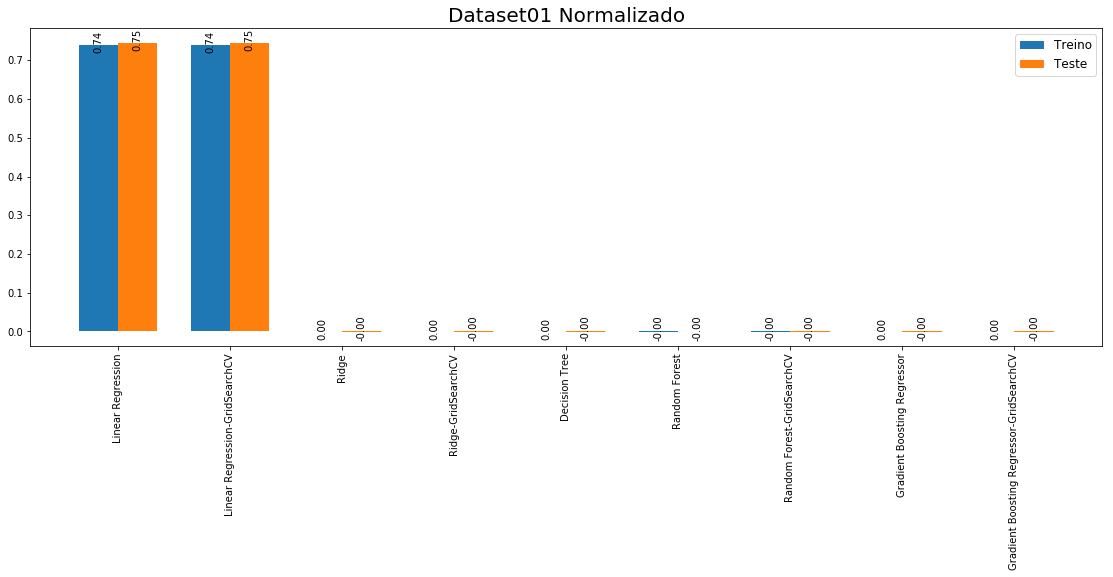

In [119]:
plot_bar_datasets(dataset_2[dataset_2['Dataset'] == 'Dataset01 normalizado']['Algoritmo'],
    dataset_2[dataset_2['Dataset'] == 'Dataset01 normalizado']['Score - Treino'],
    'Treino',
    dataset_2[dataset_2['Dataset'] == 'Dataset01 normalizado']['Score - Teste'],
    'Teste',
    'Dataset01 Normalizado')

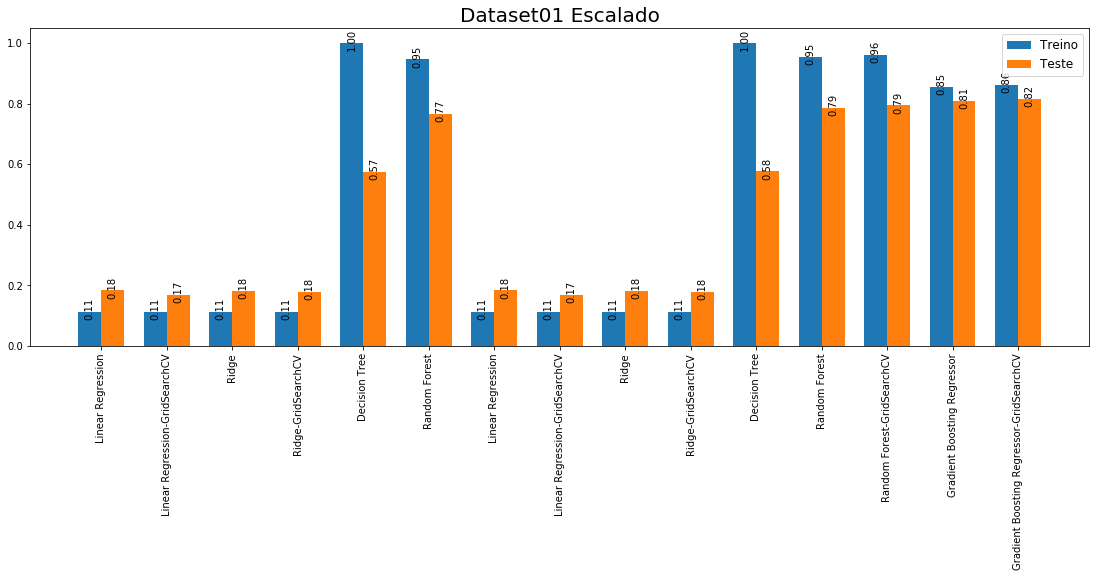

In [120]:
plot_bar_datasets(dataset_2[dataset_2['Dataset'] == 'Dataset01 escalado']['Algoritmo'],
    dataset_2[dataset_2['Dataset'] == 'Dataset01 escalado']['Score - Treino'],
    'Treino',
    dataset_2[dataset_2['Dataset'] == 'Dataset01 escalado']['Score - Teste'],
    'Teste',
    'Dataset01 Escalado')

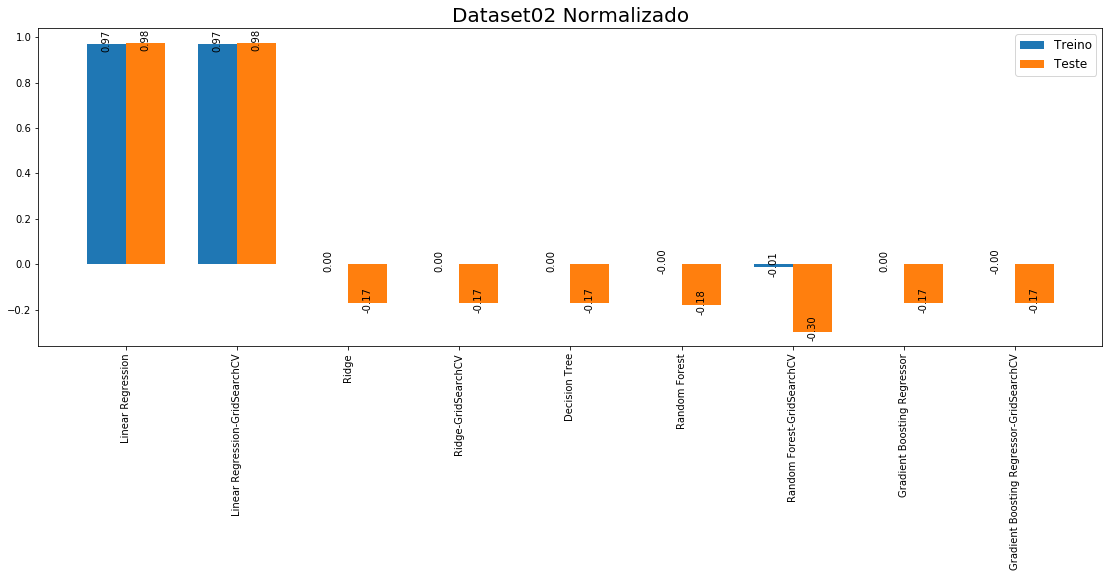

In [121]:
plot_bar_datasets(dataset_2[dataset_2['Dataset'] == 'Dataset02 normalizado']['Algoritmo'],
    dataset_2[dataset_2['Dataset'] == 'Dataset02 normalizado']['Score - Treino'],
    'Treino',
    dataset_2[dataset_2['Dataset'] == 'Dataset02 normalizado']['Score - Teste'],
    'Teste',
    'Dataset02 Normalizado')

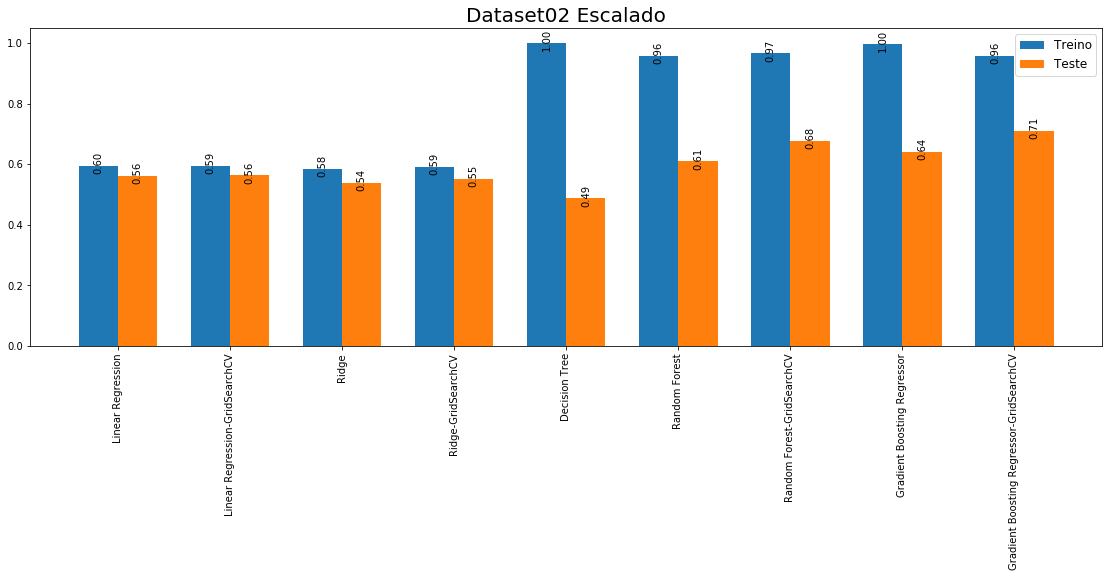

In [101]:
plot_bar_datasets(dataset_2[dataset_2['Dataset'] == 'Dataset02 escalado']['Algoritmo'],
    dataset_2[dataset_2['Dataset'] == 'Dataset02 escalado']['Score - Treino'],
    'Treino',
    dataset_2[dataset_2['Dataset'] == 'Dataset02 escalado']['Score - Teste'],
    'Teste',
    'Dataset02 Escalado')

## Resultado dos modelos<a id="resultado" />

A seguir iremos "rankear" os algoritmos levando em consideração o melhor score de teste e menor diferença entre os scores de treino e teste:

In [125]:
dataset_2[['Dataset', 'Algoritmo', 'Score - Teste', 'Score - Treino', 'Diferença']].sort_values(['Score - Teste', 'Diferença'], ascending = False)

,Dataset,Algoritmo,Score - Teste,Score - Treino,Diferença
9,Dataset02 normalizado,Linear Regression,0.9760,0.9694,0.0065
10,Dataset02 normalizado,Linear Regression-GridSearchCV,0.9760,0.9694,0.0065
32,Dataset01 escalado,Gradient Boosting Regressor-GridSearchCV,0.8154,0.8624,-0.0470
31,Dataset01 escalado,Gradient Boosting Regressor,0.8108,0.8545,-0.0438
30,Dataset01 escalado,Random Forest-GridSearchCV,0.7948,0.9627,-0.1680
29,Dataset01 escalado,Random Forest,0.7857,0.9546,-0.1689
23,Dataset01 escalado,Random Forest,0.7676,0.9465,-0.1789
0,Dataset01 normalizado,Linear Regression,0.7461,0.7409,0.0052
1,Dataset01 normalizado,Linear Regression-GridSearchCV,0.7461,0.7409,0.0052
41,Dataset02 escalado,Gradient Boosting Regressor-GridSearchCV,0.7103,0.9596,-0.2492


# Conclusão<a id="conclusao" />

De todas as transformações que fizemos nos datasets e algoritmos de machine learning aplicados, podemos chegar a conclusão de que a melhor escolha, neste caso e de acordo com todo o processo que realizamos, é a normalização do dataset com as variáveis preditoras, [IdData, FimDeSemana, QuantidadePacientes], juntamente com o algoritmo LinearRegression, que obteve um score de 0.97.

# Dashboard <a class="anchor" id="dashboard"></a>

Um dashboard para acompanhamento foi criado com o Power BI, com ele podemos obter as seguintes informações:
<ul>
    <li>Tipos de visitantes que possuem o maior tempo médio dentro dos hospitais</li>
    <li>Operadores que mais liberam visitantes - para analisar a sobrecarga de trabalho</li>
    <li>Quantidade de visitantes por tipo diariamente</li>
    <li>Quais setores de internação possui mais visitantes e/ou acompanhantes</li>
    <li>Horários de pico de entrada de visitantes</li>
    <li>Tempo médio de visitantes</li>
    <li>Quantidade total de visitas no período</li>
</ul>

In [136]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url = 'dashboardv1.png')